In [38]:

%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from ucimlrepo import fetch_ucirepo 
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, KFold, cross_val_score
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
Y = heart_disease.data.targets
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [39]:
#  decision trees, boosting family classifiers, logistic, and maybe SVMs
Y

,num
0,0
1,2
2,1
3,0
4,0
...,...
298,1
299,2
300,3
301,1


In [70]:
Y = (Y['num'] > 0).astype(float)

# If you need -1 instead of 0 for the negative class
Y[Y == 0] = -1

# Convert to numpy array and reshape to ensure it's a column vector
Y = Y.values.reshape(-1, 1)

Y

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [41]:
X.shape

(303, 13)

In [42]:
X_and_Y = np.hstack((X, Y))  
X_and_Y = X_and_Y[~np.isnan(X_and_Y).any(axis=1)]   # Stack them together for shuffling.
np.random.seed(1)               # Set the random seed.
np.random.shuffle(X_and_Y)  

print(Y.shape)
print(X.shape)
print(X_and_Y[0])

(303, 1)
(303, 13)
[ 51.    1.    3.  125.  245.    1.    2.  166.    0.    2.4   2.    0.
   3.   -1. ]


In [43]:
X = X_and_Y[:,:-1]
Y = X_and_Y[:,-1]

In [44]:
np.isnan(Y).any()

np.False_

In [45]:
X.shape

(297, 13)

In [46]:
""" 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

param_grid = {'max_depth': [1, 2, 3, 4, 5],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}
estimator = tree.DecisionTreeClassifier(criterion='entropy')

# Perform GridSearchCV
grid_search = GridSearchCV(estimator, param_grid, cv=3, scoring="accuracy")
grid_search.fit(X, Y)

# Get best hyperparameters
best_params = grid_search.best_params_ """


' \nfrom sklearn.model_selection import train_test_split, GridSearchCV\nfrom sklearn.metrics import classification_report\nimport matplotlib.pyplot as plt\nfrom sklearn.model_selection import train_test_split, GridSearchCV\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.metrics import accuracy_score\n\nparam_grid = {\'max_depth\': [1, 2, 3, 4, 5],\n              \'min_samples_split\': [2, 5, 10],\n              \'min_samples_leaf\': [1, 2, 4]}\nestimator = tree.DecisionTreeClassifier(criterion=\'entropy\')\n\n# Perform GridSearchCV\ngrid_search = GridSearchCV(estimator, param_grid, cv=3, scoring="accuracy")\ngrid_search.fit(X, Y)\n\n# Get best hyperparameters\nbest_params = grid_search.best_params_ '

In [63]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Define the parameter grid
param_grid = {
    'max_depth': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the decision tree classifier
estimator = DecisionTreeClassifier(criterion='entropy')

# Split 1: Train size = 20%, Test size = 80%
X_train_20, X_test_20, Y_train_20, Y_test_20 = train_test_split(X, Y, train_size=0.2, random_state=42)
grid_search_20 = GridSearchCV(estimator, param_grid, cv=3, scoring="accuracy")
grid_search_20.fit(X_train_20, Y_train_20)
best_params_20 = grid_search_20.best_params_
cv_score_20 = grid_search_20.best_score_
additional_cv_score_20 = np.mean(cross_val_score(grid_search_20.best_estimator_, X_train_20, Y_train_20, cv=3))

print("Results for 20% training data:")
print("Best parameters:", best_params_20)
print(f"Cross-validated Accuracy (GridSearchCV): {cv_score_20:.4f}")
print(f"Additional Cross-validated Accuracy: {additional_cv_score_20:.4f}")
y_pred_20 = grid_search_20.best_estimator_.predict(X_test_20)
print("Classification Report:")
print(classification_report(Y_test_20, y_pred_20))

# Split 2: Train size = 50%, Test size = 50%
X_train_50, X_test_50, Y_train_50, Y_test_50 = train_test_split(X, Y, train_size=0.5, random_state=42)
grid_search_50 = GridSearchCV(estimator, param_grid, cv=3, scoring="accuracy")
grid_search_50.fit(X_train_50, Y_train_50)
best_params_50 = grid_search_50.best_params_
cv_score_50 = grid_search_50.best_score_
additional_cv_score_50 = np.mean(cross_val_score(grid_search_50.best_estimator_, X_train_50, Y_train_50, cv=3))

print("\nResults for 50% training data:")
print("Best parameters:", best_params_50)
print(f"Cross-validated Accuracy (GridSearchCV): {cv_score_50:.4f}")
print(f"Additional Cross-validated Accuracy: {additional_cv_score_50:.4f}")
y_pred_50 = grid_search_50.best_estimator_.predict(X_test_50)
print("Classification Report:")
print(classification_report(Y_test_50, y_pred_50))

# Split 3: Train size = 80%, Test size = 20%
X_train_80, X_test_80, Y_train_80, Y_test_80 = train_test_split(X, Y, train_size=0.8, random_state=42)
grid_search_80 = GridSearchCV(estimator, param_grid, cv=3, scoring="accuracy")
grid_search_80.fit(X_train_80, Y_train_80)
best_params_80 = grid_search_80.best_params_
cv_score_80 = grid_search_80.best_score_
additional_cv_score_80 = np.mean(cross_val_score(grid_search_80.best_estimator_, X_train_80, Y_train_80, cv=3))

print("\nResults for 80% training data:")
print("Best parameters:", best_params_80)
print(f"Cross-validated Accuracy (GridSearchCV): {cv_score_80:.4f}")
print(f"Additional Cross-validated Accuracy: {additional_cv_score_80:.4f}")
y_pred_80 = grid_search_80.best_estimator_.predict(X_test_80)
print("Classification Report:")
print(classification_report(Y_test_80, y_pred_80))


Results for 20% training data:
Best parameters: {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
Cross-validated Accuracy (GridSearchCV): 0.6781
Additional Cross-validated Accuracy: 0.6781
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.77      0.80      0.78       127
         1.0       0.76      0.72      0.74       111

    accuracy                           0.76       238
   macro avg       0.76      0.76      0.76       238
weighted avg       0.76      0.76      0.76       238


Results for 50% training data:
Best parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5}
Cross-validated Accuracy (GridSearchCV): 0.7434
Additional Cross-validated Accuracy: 0.7230
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.72      0.86      0.78        84
         1.0       0.76      0.57      0.65        65

    accuracy                           0.73       149


In [64]:
import seaborn as sns 

def draw_heatmap(errors, D_list, title):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(errors, annot=True, fmt='.3f', yticklabels=D_list, xticklabels=[])
    ax.collections[0].colorbar.set_label('error')
    ax.set(ylabel='max depth D')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.title(title)
    plt.show()

In [65]:
""" D_list = [0,1,2,3,4,5]
cross_val_errors_20 = 1 - grid_search_50.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap(cross_val_errors_20, D_list, title="cross-val error w.r.t.") """

' D_list = [0,1,2,3,4,5]\ncross_val_errors_20 = 1 - grid_search_50.cv_results_[\'mean_test_score\'].reshape(-1,1)\ndraw_heatmap(cross_val_errors_20, D_list, title="cross-val error w.r.t.") '

### Decision Tree for 20/80 split

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Assume best_params_20 is already defined from previous GridSearchCV

accuracies_20 = []

for trial in range(3):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.2, random_state=None)
    
    # Create the classifier with best_params_20n
    best_model = DecisionTreeClassifier(criterion='entropy', **best_params_20)
    
    # Fit the model
    best_model.fit(X_train, Y_train)
    
    # Make predictions
    y_pred = best_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(Y_test, y_pred)
    accuracies_20.append(accuracy)
    
    print(f"\nTrial {trial + 1} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(Y_test, y_pred))

average_accuracy = np.mean(accuracies_20)
print(f"\nAverage Accuracy over 3 trials: {average_accuracy:.4f}")



Trial 1 Results:
Accuracy: 0.7605
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.77      0.79      0.78       129
         1.0       0.75      0.72      0.73       109

    accuracy                           0.76       238
   macro avg       0.76      0.76      0.76       238
weighted avg       0.76      0.76      0.76       238


Trial 2 Results:
Accuracy: 0.7269
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.72      0.82      0.77       131
         1.0       0.74      0.61      0.67       107

    accuracy                           0.73       238
   macro avg       0.73      0.72      0.72       238
weighted avg       0.73      0.73      0.72       238


Trial 3 Results:
Accuracy: 0.6597
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.70      0.62      0.66       125
         1.0       0.63      0.70      0.66       113

    accu

### Decision Tree for 50/50 split

In [66]:


accuracies_50 = []

for trial in range(3):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.5, random_state=None)
    
    # Create the classifier with best_params_20
    best_model = DecisionTreeClassifier(criterion='entropy', **best_params_50)
    
    # Fit the model
    best_model.fit(X_train, Y_train)
    
    # Make predictions
    y_pred = best_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(Y_test, y_pred)
    accuracies_50.append(accuracy)
    
    print(f"\nTrial {trial + 1} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(Y_test, y_pred))

average_accuracy = np.mean(accuracies_50)
print(f"\nAverage Accuracy over 3 trials: {average_accuracy:.4f}")



Trial 1 Results:
Accuracy: 0.7651
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.79      0.80      0.79        84
         1.0       0.73      0.72      0.73        65

    accuracy                           0.77       149
   macro avg       0.76      0.76      0.76       149
weighted avg       0.76      0.77      0.76       149


Trial 2 Results:
Accuracy: 0.7718
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.77      0.79      0.78        75
         1.0       0.78      0.76      0.77        74

    accuracy                           0.77       149
   macro avg       0.77      0.77      0.77       149
weighted avg       0.77      0.77      0.77       149


Trial 3 Results:
Accuracy: 0.7785
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.74      0.83      0.78        72
         1.0       0.82      0.73      0.77        77

    accu

### Decision Tree for 80/20 split

In [67]:

accuracies_80 = []

for trial in range(3):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=None)
    
    # Create the classifier with best_params_20
    best_model = DecisionTreeClassifier(criterion='entropy', **best_params_80)
    
    # Fit the model
    best_model.fit(X_train, Y_train)
    
    # Make predictions
    y_pred = best_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(Y_test, y_pred)
    accuracies_80.append(accuracy)
    
    print(f"\nTrial {trial + 1} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(Y_test, y_pred))

average_accuracy = np.mean(accuracies_80)
print(f"\nAverage Accuracy over 3 trials: {average_accuracy:.4f}")



Trial 1 Results:
Accuracy: 0.7167
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.64      0.93      0.76        29
         1.0       0.89      0.52      0.65        31

    accuracy                           0.72        60
   macro avg       0.77      0.72      0.71        60
weighted avg       0.77      0.72      0.71        60


Trial 2 Results:
Accuracy: 0.7333
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.67      0.97      0.79        32
         1.0       0.93      0.46      0.62        28

    accuracy                           0.73        60
   macro avg       0.80      0.72      0.71        60
weighted avg       0.79      0.73      0.71        60


Trial 3 Results:
Accuracy: 0.7500
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.83      0.63      0.72        30
         1.0       0.70      0.87      0.78        30

    accu

## Implementing K-nearest neighbors 

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import scipy
from matplotlib.colors import ListedColormap
from functools import partial

In [54]:
X_shuffled = X_and_Y[:,:13]
Y_shuffled = X_and_Y[:,13]

""" X_train = X_shuffled[:60]
Y_train = Y_shuffled[:60]
X_test = X_shuffled[200:]
Y_test = Y_shuffled[200:]"""
print(X_shuffled.shape)
print(Y_shuffled.shape)
print(X.shape)
print(Y.shape)

(297, 13)
(297,)
(297, 13)
(297,)


In [55]:
X.shape

(297, 13)

### Finding the best hyperparameter for 20%/80% split and testing: 

In [68]:
Y.shape

(297,)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Assuming X and Y are your feature matrix and target vector
# Example data (replace with your actual data)
# X = np.array(...)  # Your feature data
# Y = np.array(...)  # Your target data

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 27)}  # Testing k values from 1 to 20

# Create a k-NN classifier
knn = KNeighborsClassifier()\

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best cross-validation score:", best_score)

# Evaluate on the test set using the best model
best_knn = grid_search.best_estimator_
test_accuracy = accuracy_score(y_test, best_knn.predict(X_test))
print("Test accuracy with best parameters:", test_accuracy)

Best parameters: {'n_neighbors': np.int64(14)}
Best cross-validation score: 0.6831521739130435
Test accuracy with best parameters: 0.6333333333333333


In [61]:
# Assuming X, Y, and best_params are defined

# Initialize variables for storing results
accuracies = []
confusion_matrices = []
classification_reports = []

# Perform 3 trials
for trial in range(3):
    print(f"Trial {trial + 1}")

    # Split the data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=None, train_size=0.2)

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)  # Use transform, not fit_transform, for test data

    # Train the KNN classifier
    knn = KNeighborsClassifier(**best_params)
    knn.fit(X_train, Y_train)

    # Make predictions
    y_pred = knn.predict(X_test)

    # Calculate and save accuracy
    accuracy = knn.score(X_test, Y_test)
    accuracies.append(accuracy)
    print(f"Accuracy: {accuracy}")

    # Calculate and save confusion matrix and classification report
    cm = confusion_matrix(Y_test, y_pred)
    confusion_matrices.append(cm)
    print(f"Confusion Matrix:\n{cm}")

    cr = classification_report(Y_test, y_pred)
    classification_reports.append(cr)
    print(f"Classification Report:\n{cr}")

# Calculate the average accuracy
average_accuracy_1 = np.mean(accuracies)
print("\nFinal Report")
print(f"Average Accuracy: {average_accuracy_1}")


Trial 1
Accuracy: 0.819327731092437
Confusion Matrix:
[[115  17]
 [ 26  80]]
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.82      0.87      0.84       132
         1.0       0.82      0.75      0.79       106

    accuracy                           0.82       238
   macro avg       0.82      0.81      0.82       238
weighted avg       0.82      0.82      0.82       238

Trial 2
Accuracy: 0.819327731092437
Confusion Matrix:
[[117  10]
 [ 33  78]]
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.78      0.92      0.84       127
         1.0       0.89      0.70      0.78       111

    accuracy                           0.82       238
   macro avg       0.83      0.81      0.81       238
weighted avg       0.83      0.82      0.82       238

Trial 3
Accuracy: 0.7815126050420168
Confusion Matrix:
[[115  10]
 [ 42  71]]
Classification Report:
              precision    recall  f1-score  

### Finding the best hyperparameter for 50%/50% split and testing: 

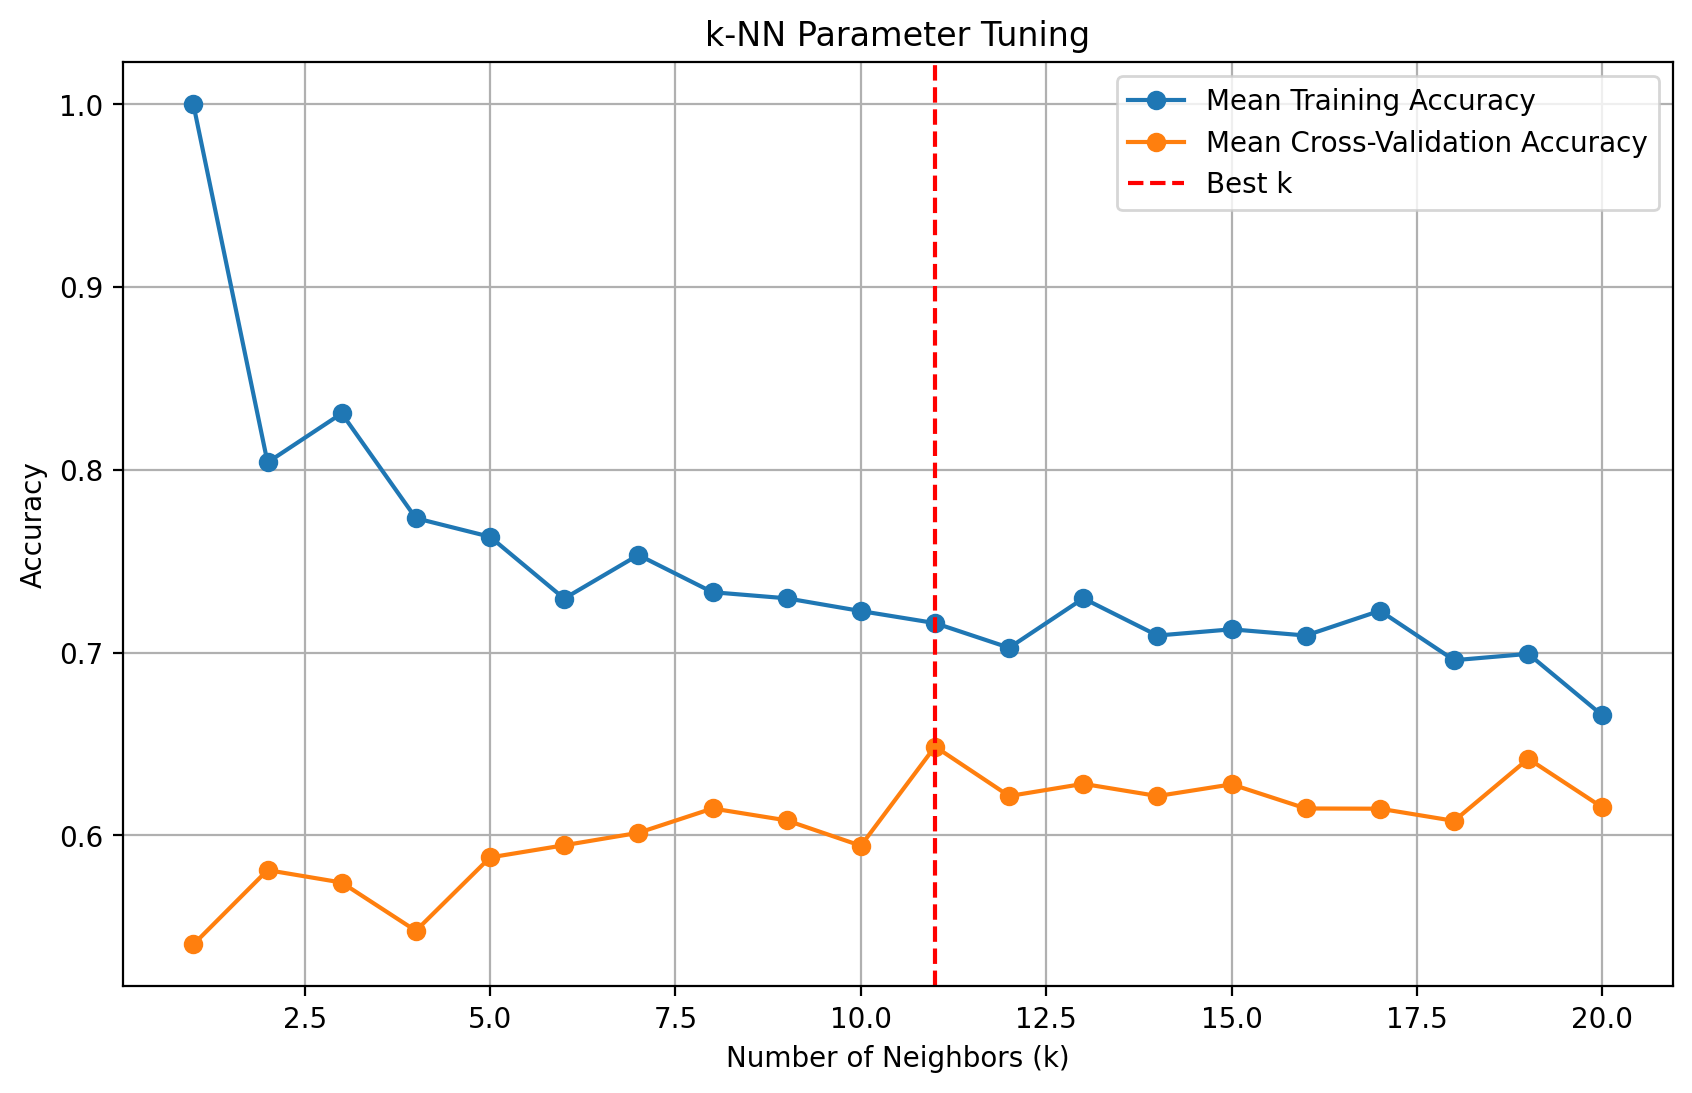

Best parameters: {'n_neighbors': np.int64(11)}
Best cross-validation score: 0.6485714285714286
Test accuracy with best parameters: 0.697986577181208


In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.5, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 21)}  # Testing k values from 1 to 20

# Create a k-NN classifier
knn = KNeighborsClassifier()\

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

# Visualize the results
results = grid_search.cv_results_
k_values = param_grid['n_neighbors']
mean_train_scores = results['mean_train_score']
mean_test_scores = results['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_train_scores, label='Mean Training Accuracy', marker='o')
plt.plot(k_values, mean_test_scores, label='Mean Cross-Validation Accuracy', marker='o')
plt.axvline(grid_search.best_params_['n_neighbors'], color='r', linestyle='--', label='Best k')
plt.title('k-NN Parameter Tuning')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best cross-validation score:", best_score)

# Evaluate on the test set using the best model
best_knn = grid_search.best_estimator_
test_accuracy = accuracy_score(y_test, best_knn.predict(X_test))
print("Test accuracy with best parameters:", test_accuracy)

In [24]:
len(X_train)

148

In [25]:


# Initialize variables for storing results
accuracies = []
confusion_matrices = []
classification_reports = []

# Perform 3 trials
for trial in range(3):
    print(f"Trial {trial + 1}")

    # Split the data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=None, train_size=0.5)

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)  # Use transform, not fit_transform, for test data

    # Train the KNN classifier
    knn = KNeighborsClassifier(**best_params)
    knn.fit(X_train, Y_train)

    # Make predictions
    y_pred = knn.predict(X_test)

    # Calculate and save accuracy
    accuracy = knn.score(X_test, Y_test)
    accuracies.append(accuracy)
    print(f"Accuracy: {accuracy}")

    # Calculate and save confusion matrix and classification report
    cm = confusion_matrix(Y_test, y_pred)
    confusion_matrices.append(cm)
    print(f"Confusion Matrix:\n{cm}")

    cr = classification_report(Y_test, y_pred)
    classification_reports.append(cr)
    print(f"Classification Report:\n{cr}")

# Calculate the average accuracy
average_accuracy_2 = np.mean(accuracies)
print("\nFinal Report")
print(f"Average Accuracy: {average_accuracy_2}")


Trial 1
Accuracy: 0.7718120805369127
Confusion Matrix:
[[64 13]
 [21 51]]
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.75      0.83      0.79        77
         1.0       0.80      0.71      0.75        72

    accuracy                           0.77       149
   macro avg       0.77      0.77      0.77       149
weighted avg       0.77      0.77      0.77       149

Trial 2
Accuracy: 0.785234899328859
Confusion Matrix:
[[70 10]
 [22 47]]
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.76      0.88      0.81        80
         1.0       0.82      0.68      0.75        69

    accuracy                           0.79       149
   macro avg       0.79      0.78      0.78       149
weighted avg       0.79      0.79      0.78       149

Trial 3
Accuracy: 0.7919463087248322
Confusion Matrix:
[[70 15]
 [16 48]]
Classification Report:
              precision    recall  f1-score   support

 

### Finding the best hyperparameter for 80%/20% split and testing: 

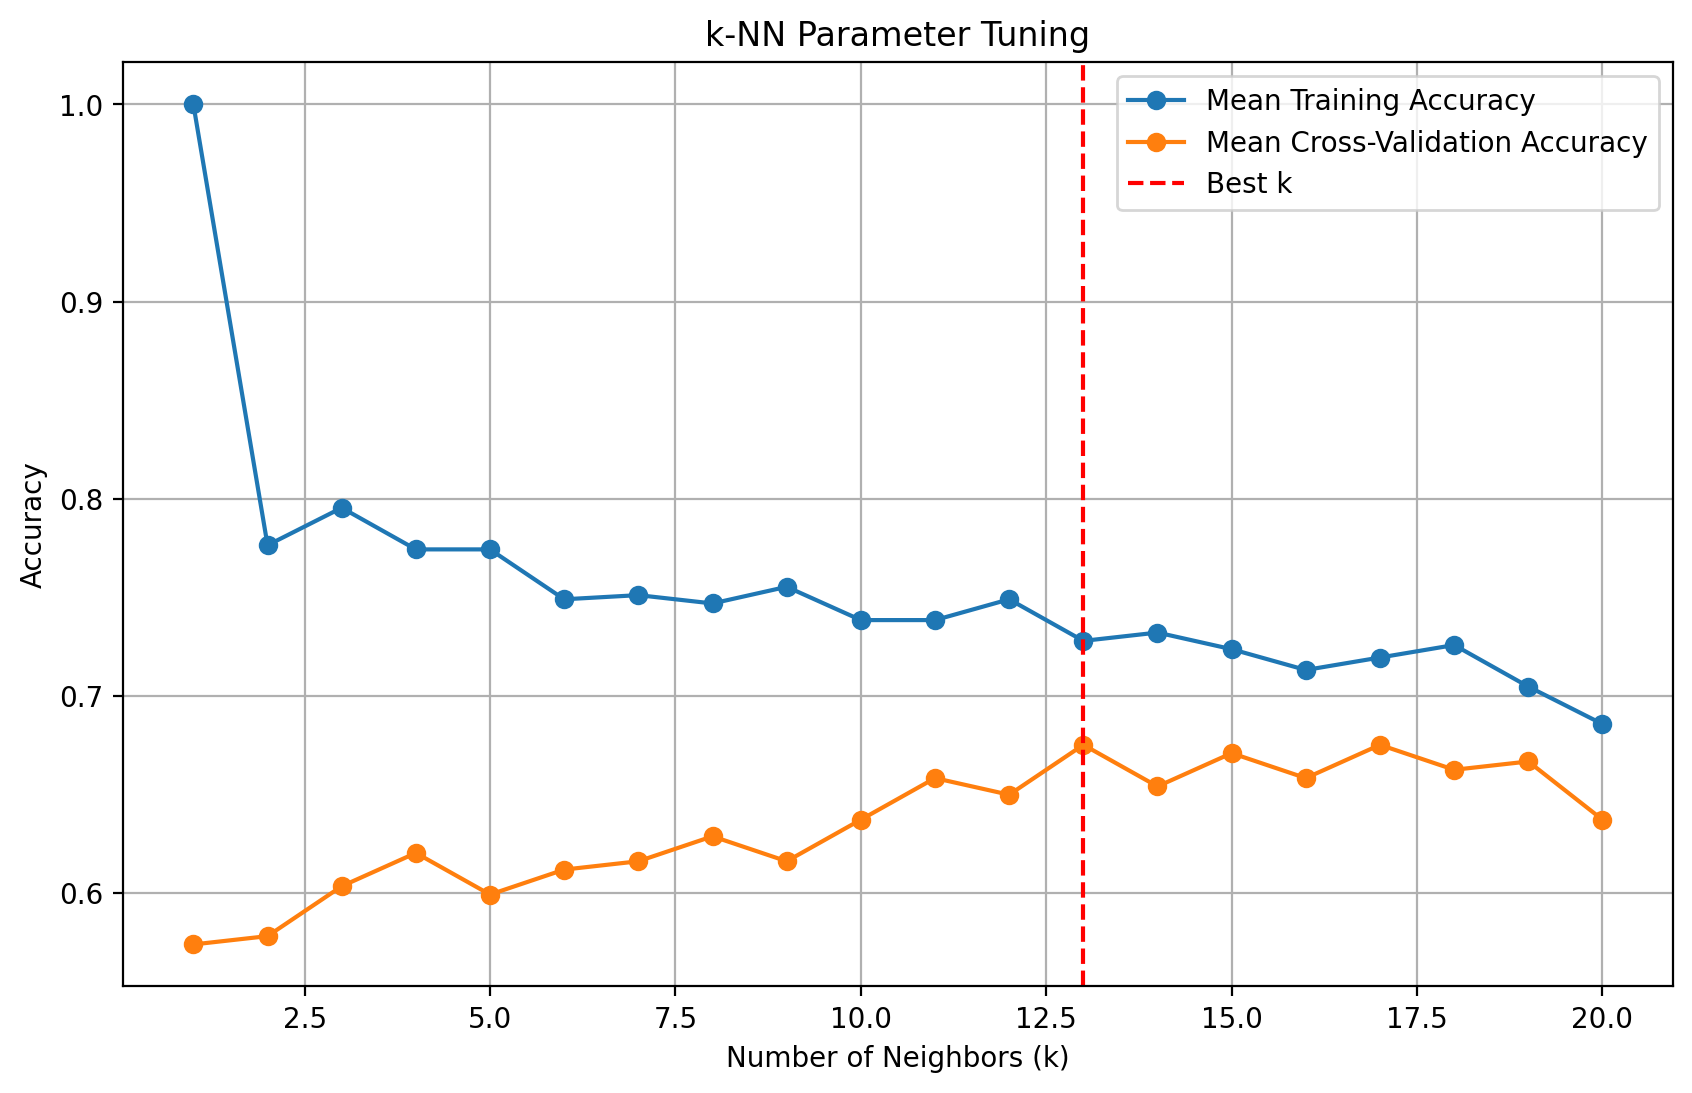

Best parameters: {'n_neighbors': np.int64(13)}
Best cross-validation score: 0.6751054852320676
Test accuracy with best parameters: 0.6333333333333333


In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 21)}  # Testing k values from 1 to 20

# Create a k-NN classifier
knn = KNeighborsClassifier()\

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

# Visualize the results
results = grid_search.cv_results_
k_values = param_grid['n_neighbors']
mean_train_scores = results['mean_train_score']
mean_test_scores = results['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_train_scores, label='Mean Training Accuracy', marker='o')
plt.plot(k_values, mean_test_scores, label='Mean Cross-Validation Accuracy', marker='o')
plt.axvline(grid_search.best_params_['n_neighbors'], color='r', linestyle='--', label='Best k')
plt.title('k-NN Parameter Tuning')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best cross-validation score:", best_score)

# Evaluate on the test set using the best model
best_knn = grid_search.best_estimator_
test_accuracy = accuracy_score(y_test, best_knn.predict(X_test))
print("Test accuracy with best parameters:", test_accuracy)

In [27]:
# Assuming X, Y, and best_params are defined

# Initialize variables for storing results
accuracies = []
confusion_matrices = []
classification_reports = []

# Perform 3 trials
for trial in range(3):
    print(f"Trial {trial + 1}")

    # Split the data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=None, train_size=0.8)

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)  # Use transform, not fit_transform, for test data

    # Train the KNN classifier
    knn = KNeighborsClassifier(**best_params)
    knn.fit(X_train, Y_train)

    # Make predictions
    y_pred = knn.predict(X_test)

    # Calculate and save accuracy
    accuracy = knn.score(X_test, Y_test)
    accuracies.append(accuracy)
    print(f"Accuracy: {accuracy}")

    # Calculate and save confusion matrix and classification report
    cm = confusion_matrix(Y_test, y_pred)
    confusion_matrices.append(cm)
    print(f"Confusion Matrix:\n{cm}")

    cr = classification_report(Y_test, y_pred)
    classification_reports.append(cr)
    print(f"Classification Report:\n{cr}")

# Calculate the average accuracy
average_accuracy_3 = np.mean(accuracies)
print("\nFinal Report")
print(f"Average Accuracy: {average_accuracy_3}")


Trial 1
Accuracy: 0.8
Confusion Matrix:
[[24  4]
 [ 8 24]]
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.75      0.86      0.80        28
         1.0       0.86      0.75      0.80        32

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.81      0.80      0.80        60

Trial 2
Accuracy: 0.7833333333333333
Confusion Matrix:
[[29  7]
 [ 6 18]]
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.83      0.81      0.82        36
         1.0       0.72      0.75      0.73        24

    accuracy                           0.78        60
   macro avg       0.77      0.78      0.78        60
weighted avg       0.79      0.78      0.78        60

Trial 3
Accuracy: 0.8333333333333334
Confusion Matrix:
[[27  5]
 [ 5 23]]
Classification Report:
              precision    recall  f1-score   support

        -1.0   

## Random Forest

In [31]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming X, Y are defined

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5],
    'max_features': [1, 8, 20]
}

# Find best parameters for each split
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(X, Y, train_size=0.2, random_state=42)
grid_search_20 = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='accuracy')
grid_search_20.fit(X_train_20, y_train_20)
best_params_20 = grid_search_20.best_params_

X_train_50, X_test_50, y_train_50, y_test_50 = train_test_split(X, Y, train_size=0.5, random_state=42)
grid_search_50 = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='accuracy')
grid_search_50.fit(X_train_50, y_train_50)
best_params_50 = grid_search_50.best_params_

X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X, Y, train_size=0.8, random_state=42)
grid_search_80 = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='accuracy')
grid_search_80.fit(X_train_80, y_train_80)
best_params_80 = grid_search_80.best_params_

# Visualization of hyperparameter tuning
results_20 = grid_search_20.cv_results_
results_50 = grid_search_50.cv_results_
results_80 = grid_search_80.cv_results_

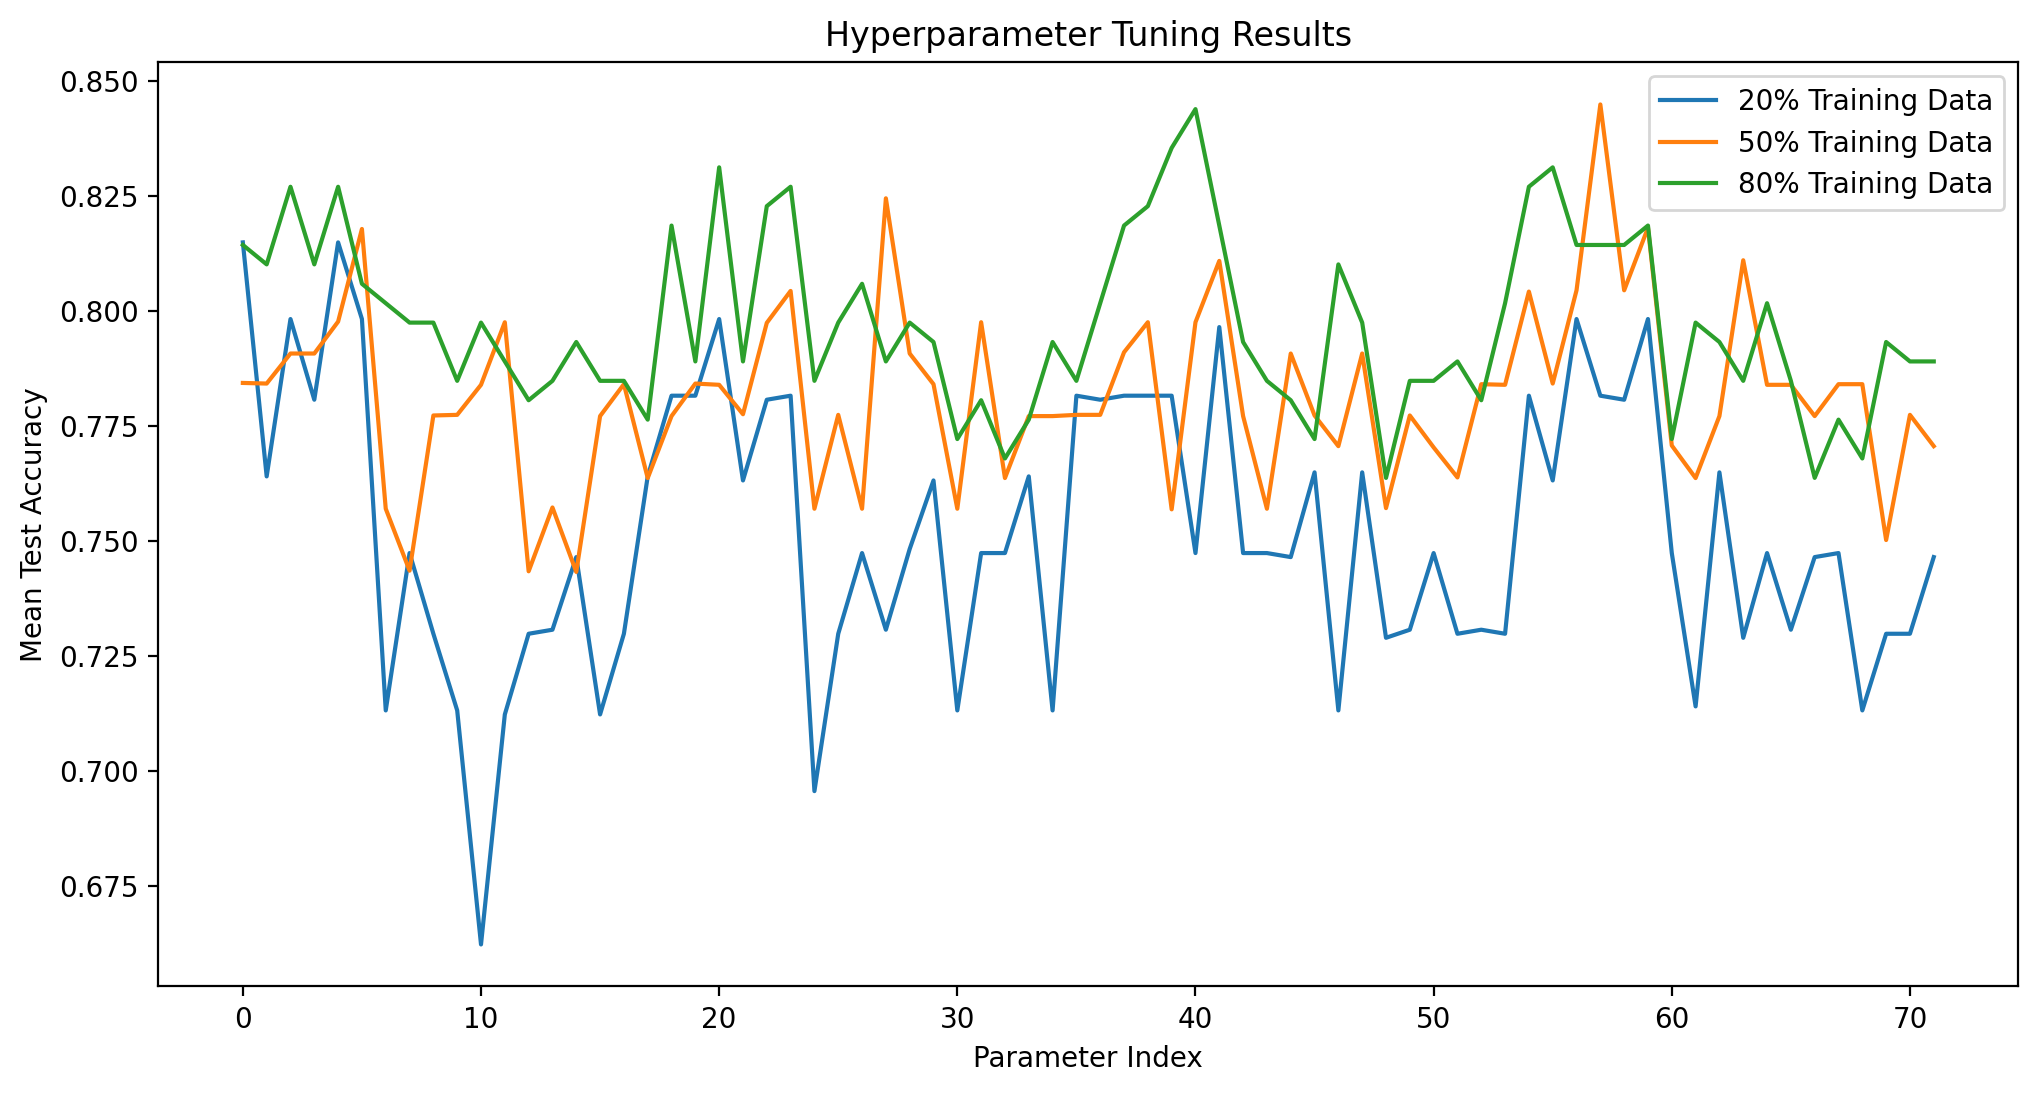

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(results_20['mean_test_score'], label='20% Training Data')
plt.plot(results_50['mean_test_score'], label='50% Training Data')
plt.plot(results_80['mean_test_score'], label='80% Training Data')
plt.xlabel('Parameter Index')
plt.ylabel('Mean Test Accuracy')
plt.title('Hyperparameter Tuning Results')
plt.legend()
plt.show()

In [33]:
# Code block for 20% split
print("20% Training Data")
accuracies_20 = []
for trial in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.2, random_state=None, shuffle=True)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    rf = RandomForestClassifier(**best_params_20)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_20.append(accuracy)
    print(f"Trial {trial + 1} Accuracy: {accuracy}")
    print(f"Classification Report for Trial {trial + 1}: {classification_report(y_test, y_pred)}")
print(f"Average Accuracy for 20% Training Data: {np.mean(accuracies_20)}\n")



20% Training Data
Trial 1 Accuracy: 0.8277310924369747
Classification Report for Trial 1:               precision    recall  f1-score   support

        -1.0       0.84      0.84      0.84       127
         1.0       0.82      0.81      0.81       111

    accuracy                           0.83       238
   macro avg       0.83      0.83      0.83       238
weighted avg       0.83      0.83      0.83       238

Trial 2 Accuracy: 0.8109243697478992
Classification Report for Trial 2:               precision    recall  f1-score   support

        -1.0       0.77      0.92      0.84       126
         1.0       0.89      0.69      0.77       112

    accuracy                           0.81       238
   macro avg       0.83      0.80      0.81       238
weighted avg       0.82      0.81      0.81       238

Trial 3 Accuracy: 0.7857142857142857
Classification Report for Trial 3:               precision    recall  f1-score   support

        -1.0       0.77      0.86      0.82       131
   

In [ ]:
# Code block for 50% split
print("50% Training Data")
accuracies_50 = []
for trial in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.5, random_state=None, shuffle=True)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    rf = RandomForestClassifier(**best_params_50)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_50.append(accuracy)
    print(f"Trial {trial + 1} Accuracy: {accuracy}")
    print(f"Classification Report for Trial {trial + 1}: {classification_report(y_test, y_pred)}")
print(f"Average Accuracy for 50% Training Data: {np.mean(accuracies_50)}\n")

50% Training Data
Trial 1 Accuracy: 0.8456375838926175
Classification Report for Trial 1:               precision    recall  f1-score   support

        -1.0       0.85      0.86      0.86        81
         1.0       0.84      0.82      0.83        68

    accuracy                           0.85       149
   macro avg       0.84      0.84      0.84       149
weighted avg       0.85      0.85      0.85       149

Trial 2 Accuracy: 0.8053691275167785
Classification Report for Trial 2:               precision    recall  f1-score   support

        -1.0       0.83      0.82      0.82        83
         1.0       0.78      0.79      0.78        66

    accuracy                           0.81       149
   macro avg       0.80      0.80      0.80       149
weighted avg       0.81      0.81      0.81       149

Trial 3 Accuracy: 0.7785234899328859
Classification Report for Trial 3:               precision    recall  f1-score   support

        -1.0       0.81      0.78      0.79        80
   

In [ ]:
# Code block for 80% split
print("80% Training Data")
accuracies_80 = []
for trial in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=None, shuffle=True)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    rf = RandomForestClassifier(**best_params_80)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_80.append(accuracy)
    print(f"Trial {trial + 1} Accuracy: {accuracy}")
    print(f"Classification Report for Trial {trial + 1}:{classification_report(y_test, y_pred)}")
print(f"Average Accuracy for 80% Training Data: {np.mean(accuracies_80)}\n")

80% Training Data
Trial 1 Accuracy: 0.8
Classification Report for Trial 1:              precision    recall  f1-score   support

        -1.0       0.85      0.80      0.82        35
         1.0       0.74      0.80      0.77        25

    accuracy                           0.80        60
   macro avg       0.79      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60

Trial 2 Accuracy: 0.8166666666666667
Classification Report for Trial 2:              precision    recall  f1-score   support

        -1.0       0.86      0.83      0.85        36
         1.0       0.76      0.79      0.78        24

    accuracy                           0.82        60
   macro avg       0.81      0.81      0.81        60
weighted avg       0.82      0.82      0.82        60

Trial 3 Accuracy: 0.85
Classification Report for Trial 3:              precision    recall  f1-score   support

        -1.0       0.79      0.93      0.86        29
         1.0       0.92      0.77  